In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
pd.options.display.max_columns = 500

In [3]:
data_twitter = "Data/gender-classifier-DFE-791531.csv"

In [4]:
df_twitter = pd.read_csv(data_twitter, encoding="latin1")

In [5]:
df_twitter.shape

(20050, 26)

In [6]:
cols = ["_unit_id", "_last_judgment_at", "gender", "created", "description", "name", "text", "fav_number",
       "tweet_location"]

In [7]:
df_twitter.name.nunique()

18795

In [8]:
df_twitter.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [9]:
df_twitter_sample =  df_twitter.drop_duplicates("name").reset_index(drop=True)[cols]

In [10]:
df_twitter_sample.head()

,_unit_id,_last_judgment_at,gender,created,description,name,text,fav_number,tweet_location
0,815719226,10/26/15 23:24,male,12/5/13 1:48,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,0,main; @Kan1shk3
1,815719227,10/26/15 23:30,male,10/1/12 13:51,I'm the author of novels filled with family dr...,DavdBurnett,ÛÏIt felt like they were my friends and I was...,68,NaN
2,815719228,10/26/15 23:33,male,11/28/14 11:30,louis whining and squealing and all,lwtprettylaugh,i absolutely adore when louis starts the songs...,7696,clcncl
3,815719229,10/26/15 23:10,male,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...,202,"Palo Alto, CA"
4,815719230,10/27/15 1:15,female,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,37318,NaN


In [11]:
df_simulated = simulator.simulate(data_path="Data/", n=df_twitter_sample.shape[0])

/home/stevramos/Documents/personal_projects/space hackathon


In [12]:
df_personas = pd.concat([df_twitter_sample, df_simulated],axis=1)

In [13]:
df_personas = df_personas.loc[df_personas.gender!="brand",:]

In [14]:
df_personas.to_csv('df_personas.csv')

In [15]:
df_personas.shape

(13375, 25)

In [16]:
df_personas.head()

,_unit_id,_last_judgment_at,gender,created,description,name,text,fav_number,tweet_location,dni,edad,cod_ubigeo,provincia,rcc_cal_gral,rcc_num_ent_sbs,rcc_linea_tc_max,rcc_nro_prod,num_seguros_salud,ingreso_mens,es_cliente,flg_viaje_tw,tipo_vivienda,sit_laboral,segmento,prod_interes
0,815719226,10/26/15 23:24,male,12/5/13 1:48,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,0,main; @Kan1shk3,11133,21,150102,SAN JUAN DE LURIGANCHO,PER,8,34.847456,15,1,599.184484,0,0,alqui,DEP,SEGM3,TA
1,815719227,10/26/15 23:30,male,10/1/12 13:51,I'm the author of novels filled with family dr...,DavdBurnett,ÛÏIt felt like they were my friends and I was...,68,NaN,7095,39,150102,VILLA MARIA DEL TRIUNFO,DUD,2,2971.950064,4,1,2567.286210,0,1,hipot,DEP,SEGM2,PREST
2,815719228,10/26/15 23:33,male,11/28/14 11:30,louis whining and squealing and all,lwtprettylaugh,i absolutely adore when louis starts the songs...,7696,clcncl,9113,34,150111,PACHACAMAC,CPP,6,507.078052,4,2,327.930607,0,0,hipot,DEP,SEGM3,FM
3,815719229,10/26/15 23:10,male,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...,202,"Palo Alto, CA",16430,66,150121,LURIGANCHO-CHOSICA,CPP,6,422.661469,14,1,964.359778,1,1,alqui,INDEP,SEGM4,T_CAMBIO
4,815719230,10/27/15 1:15,female,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,37318,NaN,7787,62,150107,LOS OLIVOS,PER,7,541.968749,8,1,927.554705,1,0,fami,DEP,SEGM3,T_CAMBIO


In [17]:
df_personas["created"] = pd.to_datetime(df_personas["created"], format='%m/%d/%y %H:%M')
df_personas["_last_judgment_at"] = pd.to_datetime(df_personas["_last_judgment_at"], format='%m/%d/%y %H:%M')

In [18]:
df_personas["diff_lj_created"] = (df_personas["_last_judgment_at"].dt.year.astype(int)*360 + df_personas["_last_judgment_at"].dt.month.astype(int)*30).astype(int) - (df_personas["created"].dt.year.astype(int)*360 + df_personas["created"].dt.month.astype(int)*30).astype(int)   #- df_personas["created"].dt.to_period("M")

In [19]:
num_vars = ["flg_viaje_tw", "ingreso_mens", "num_seguros_salud", "rcc_nro_prod", "rcc_linea_tc_max", 
           "rcc_num_ent_sbs", "edad","diff_lj_created"]

In [20]:
def processing_num_vars(df):
    df_personas = df.copy()
    df_personas['log_ingreso_mens']=np.log(df_personas['ingreso_mens'] + 1)
    df_personas['log_num_seguros_salud']=np.log(df_personas['num_seguros_salud']+1)
    df_personas['log_rcc_nro_prod']=np.log(df_personas['rcc_nro_prod']+1)
    df_personas['log_rcc_linea_tc_max']=np.log(df_personas['rcc_linea_tc_max'] + 1)
    df_personas['log_rcc_num_ent_sbs']=np.log(df_personas['rcc_num_ent_sbs'] + 1)
    df_personas['log_edad']=np.log(df_personas['edad'] + 1)
    df_personas['log_diff_lj_created']=np.log(df_personas['diff_lj_created'] + 1)

    return df_personas

In [21]:
df_personas.head(1)

,_unit_id,_last_judgment_at,gender,created,description,name,text,fav_number,tweet_location,dni,edad,cod_ubigeo,provincia,rcc_cal_gral,rcc_num_ent_sbs,rcc_linea_tc_max,rcc_nro_prod,num_seguros_salud,ingreso_mens,es_cliente,flg_viaje_tw,tipo_vivienda,sit_laboral,segmento,prod_interes,diff_lj_created
0,815719226,2015-10-26 23:24:00,male,2013-12-05 01:48:00,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,0,main; @Kan1shk3,11133,21,150102,SAN JUAN DE LURIGANCHO,PER,8,34.847456,15,1,599.184484,0,0,alqui,DEP,SEGM3,TA,660


In [22]:
df_personas.sit_laboral.value_counts()

DEP      8072
INDEP    5303
Name: sit_laboral, dtype: int64

In [23]:
df_personas.tipo_vivienda.value_counts()

alqui     5338
hipot     4047
fami      1360
otro      1328
propia    1302
Name: tipo_vivienda, dtype: int64

In [24]:
def get_nse(serie):
    
    #print(serie)
    
    if (serie["sit_laboral"] == "DEP") and (serie["tipo_vivienda"] in ["propia"]):
        return "A"
    elif (serie["sit_laboral"] == "DEP") and (serie["tipo_vivienda"] in ["fami", "hipot"]):
        return "B"
    elif (serie["sit_laboral"] == "DEP") and (serie["tipo_vivienda"] in ["fami", "alqui"]):
        return "C"
    else: 
        return "D"
    

In [25]:
df_personas["nse"] = df_personas.apply(get_nse, axis=1)

In [26]:
cat_vars = ["gender", "provincia", "rcc_cal_gral", "nse", "segmento"]

In [27]:
def processing_cat_vars(df):
    df_personas = df.copy()
    
    df_personas.loc[df_personas.rcc_cal_gral=='OK','enc_rcc_cal_gral']=5
    df_personas.loc[df_personas.rcc_cal_gral=='CPP','enc_rcc_cal_gral']=4
    df_personas.loc[df_personas.rcc_cal_gral=='DEF','enc_rcc_cal_gral']=3
    df_personas.loc[df_personas.rcc_cal_gral=='DUD','enc_rcc_cal_gral']=2
    df_personas.loc[df_personas.rcc_cal_gral=='PER','enc_rcc_cal_gral']=1
    df_personas.loc[df_personas.rcc_cal_gral=='OTR','enc_rcc_cal_gral']=0
    
    df_personas.loc[df_personas.nse=='A','enc_nse']=4
    df_personas.loc[df_personas.nse=='B','enc_nse']=3
    df_personas.loc[df_personas.nse=='C','enc_nse']=2
    df_personas.loc[df_personas.nse=='D','enc_nse']=1
    df_personas.loc[df_personas.nse=='E','enc_nse']=0
    
    df_personas.loc[df_personas.segmento=='SEGM4','enc_segmento']=3
    df_personas.loc[df_personas.segmento=='SEGM3','enc_segmento']=2
    df_personas.loc[df_personas.segmento=='SEGM2','enc_segmento']=1
    df_personas.loc[df_personas.segmento=='SEGM1','enc_segmento']=0

    
    df_personas['enc_gender'] = df_personas['gender'].map(df_personas['gender'].value_counts()/len(df_personas))
    df_personas['enc_provincia'] = df_personas['provincia'].map(df_personas['provincia'].value_counts()/len(df_personas))
    
    le=LabelEncoder()
    df_personas['le_provincia']=le.fit_transform(df_personas['provincia'])
    
    return df_personas

In [28]:
cols_yes = ["log_ingreso_mens", "log_num_seguros_salud", "log_rcc_nro_prod", "log_rcc_linea_tc_max", 
            "log_rcc_num_ent_sbs", "log_edad", "log_diff_lj_created","enc_rcc_cal_gral",
            "enc_nse", "enc_segmento", "enc_gender", "le_provincia"]
num_vars + cat_vars

['flg_viaje_tw',
 'ingreso_mens',
 'num_seguros_salud',
 'rcc_nro_prod',
 'rcc_linea_tc_max',
 'rcc_num_ent_sbs',
 'edad',
 'diff_lj_created',
 'gender',
 'provincia',
 'rcc_cal_gral',
 'nse',
 'segmento']

In [29]:
df_personas = df_personas.dropna()

In [30]:
df_personas = processing_cat_vars(df_personas)

df_personas = processing_num_vars(df_personas)

In [31]:
df_personas[cols_yes].head()

,log_ingreso_mens,log_num_seguros_salud,log_rcc_nro_prod,log_rcc_linea_tc_max,log_rcc_num_ent_sbs,log_edad,log_diff_lj_created,enc_rcc_cal_gral,enc_nse,enc_segmento,enc_gender,le_provincia
0,6.397237,0.693147,2.772589,3.579273,2.197225,3.091042,6.493754,1.0,2.0,2.0,0.489182,39
2,5.795847,1.098612,1.609438,6.230635,1.945910,3.555348,5.802118,4.0,3.0,2.0,0.489182,29
3,6.872501,0.693147,2.708050,6.048935,1.945910,4.204693,7.732369,4.0,1.0,3.0,0.489182,24
5,6.320264,1.098612,2.397895,7.646119,1.098612,3.761200,7.606387,1.0,1.0,1.0,0.457875,25
9,6.520814,0.693147,2.079442,7.059263,1.791759,3.526361,7.372118,4.0,1.0,2.0,0.457875,28


In [32]:
df_personas[cols_yes].dtypes

log_ingreso_mens         float64
log_num_seguros_salud    float64
log_rcc_nro_prod         float64
log_rcc_linea_tc_max     float64
log_rcc_num_ent_sbs      float64
log_edad                 float64
log_diff_lj_created      float64
enc_rcc_cal_gral         float64
enc_nse                  float64
enc_segmento             float64
enc_gender               float64
le_provincia               int64
dtype: object

In [33]:
df_personas[cols_yes].dropna()

,log_ingreso_mens,log_num_seguros_salud,log_rcc_nro_prod,log_rcc_linea_tc_max,log_rcc_num_ent_sbs,log_edad,log_diff_lj_created,enc_rcc_cal_gral,enc_nse,enc_segmento,enc_gender,le_provincia
0,6.397237,0.693147,2.772589,3.579273,2.197225,3.091042,6.493754,1.0,2.0,2.0,0.489182,39
2,5.795847,1.098612,1.609438,6.230635,1.945910,3.555348,5.802118,4.0,3.0,2.0,0.489182,29
3,6.872501,0.693147,2.708050,6.048935,1.945910,4.204693,7.732369,4.0,1.0,3.0,0.489182,24
5,6.320264,1.098612,2.397895,7.646119,1.098612,3.761200,7.606387,1.0,1.0,1.0,0.457875,25
9,6.520814,0.693147,2.079442,7.059263,1.791759,3.526361,7.372118,4.0,1.0,2.0,0.457875,28
...,...,...,...,...,...,...,...,...,...,...,...,...
18785,6.818420,0.693147,1.791759,7.261719,1.386294,3.970292,7.528869,1.0,3.0,2.0,0.457875,27
18788,5.948255,1.098612,2.079442,7.467064,0.693147,3.663562,7.528869,4.0,3.0,2.0,0.489182,23
18789,6.830472,0.693147,2.197225,8.489951,1.098612,4.219508,7.719130,4.0,2.0,1.0,0.457875,24
18790,7.332134,0.693147,1.945910,4.293501,1.945910,4.189655,6.898715,2.0,2.0,0.0,0.489182,47


## Clustering

In [34]:
# Librerías
#Algoritmo
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
df_personas_md = df_personas[cols_yes].dropna()

In [36]:
def elbowMethod(datos, max_clusters = 10, iterat = 200):

    wcss = []

    for i in range(1, max_clusters):

        kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter=iterat, n_init=10, random_state=123)
        kmeans.fit(datos)

        wcss.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters), wcss)
    plt.title("Método del codo")
    plt.xlabel("Cantidad de clusters")
    plt.ylabel("WCSS(k)")
    plt.show()


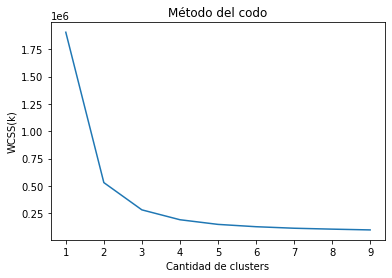

In [37]:
elbowMethod(df_personas_md)

In [38]:
# Config modelo
Kmeans = KMeans(n_clusters=3, random_state=123).fit(df_personas_md)

In [39]:
# Predecimos el grupo
y_pred = Kmeans.predict(df_personas_md)

In [40]:
y_pred

array([2, 0, 0, ..., 0, 2, 2], dtype=int32)

In [42]:
labels = y_pred

Para visualizar bien, usemos PCA y miremos la distribución de los datos por clasificación real y por clasificación inferida:

In [43]:
'''from sklearn.decomposition import PCA

# Se usa PCA para reducir dimensiones de 64 a solo 2
X = PCA(2).fit_transform(df_personas_md)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10), edgecolor='none', alpha=0.6, s=100)

fig, ax = plt.subplots(1, 2, figsize=(12, 6));

ax[1].set_title('Clasificación Aprendida');
ax[1].axis('off');
ax[1].scatter(X[:, 0], X[:, 1], c=labels, **kwargs);'''

"from sklearn.decomposition import PCA\n\n# Se usa PCA para reducir dimensiones de 64 a solo 2\nX = PCA(2).fit_transform(df_personas_md)\n\nkwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10), edgecolor='none', alpha=0.6, s=100)\n\nfig, ax = plt.subplots(1, 2, figsize=(12, 6));\n\nax[1].set_title('Clasificación Aprendida');\nax[1].axis('off');\nax[1].scatter(X[:, 0], X[:, 1], c=labels, **kwargs);"

In [44]:
# Asignar valores como target
df_personas_md['Target'] = y_pred

In [45]:
df_personas_md.groupby('Target').mean()

,log_ingreso_mens,log_num_seguros_salud,log_rcc_nro_prod,log_rcc_linea_tc_max,log_rcc_num_ent_sbs,log_edad,log_diff_lj_created,enc_rcc_cal_gral,enc_nse,enc_segmento,enc_gender,le_provincia
Target,,,,,,,,,,,,
0,6.336981,0.788743,2.197493,6.319047,1.564547,3.732453,6.869425,2.581344,1.890929,1.701065,0.452566,24.897539
1,6.276596,0.792894,2.197902,6.309461,1.566827,3.731744,6.861890,2.621702,1.924935,1.707172,0.452409,8.118915
2,6.360769,0.793556,2.189291,6.332970,1.573912,3.726680,6.864641,2.594614,1.904512,1.718083,0.450356,42.340679


In [46]:
df_personas_md.shape

(8273, 13)

In [ ]:
# Grupo 1: 2684
# Grupo 2: 2792
# Grupo 3: 2797

In [ ]:
df_final['target']= y_pred

In [105]:
df_final = df_personas.dropna()
df_final['target']= y_pred

In [107]:
df_final.head()

,_unit_id,_last_judgment_at,gender,created,description,name,text,fav_number,tweet_location,dni,edad,cod_ubigeo,provincia,rcc_cal_gral,rcc_num_ent_sbs,rcc_linea_tc_max,rcc_nro_prod,num_seguros_salud,ingreso_mens,es_cliente,flg_viaje_tw,tipo_vivienda,sit_laboral,segmento,prod_interes,diff_lj_created,nse,enc_rcc_cal_gral,enc_nse,enc_segmento,enc_gender,enc_provincia,le_provincia,log_ingreso_mens,log_num_seguros_salud,log_rcc_nro_prod,log_rcc_linea_tc_max,log_rcc_num_ent_sbs,log_edad,log_diff_lj_created,target
0,815719226,2015-10-26 23:24:00,male,2013-12-05 01:48:00,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,0,main; @Kan1shk3,10258,47,150130,COMAS,PER,4,561.364765,5,1,480.752552,0,0,alqui,DEP,SEGM1,CTA_AHORRO,660,C,1.0,2.0,0.0,0.489182,0.018494,12,6.177431,0.693147,1.791759,6.332151,1.609438,3.871201,6.493754,1
2,815719228,2015-10-26 23:33:00,male,2014-11-28 11:30:00,louis whining and squealing and all,lwtprettylaugh,i absolutely adore when louis starts the songs...,7696,clcncl,9406,34,150901,LURIGANCHO-CHOSICA,DUD,4,1056.139367,4,1,6343.573360,0,1,hipot,DEP,SEGM2,T_CAMBIO,330,B,2.0,3.0,1.0,0.489182,0.017285,24,8.755355,0.693147,1.609438,6.963322,1.609438,3.555348,5.802118,2
3,815719229,2015-10-26 23:10:00,male,2009-06-11 22:39:00,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...,202,"Palo Alto, CA",5840,60,150901,LOS OLIVOS,CPP,1,926.663718,17,1,89.726835,0,1,hipot,DEP,SEGM2,TC,2280,B,4.0,3.0,1.0,0.489182,0.017648,23,4.507853,0.693147,2.890372,6.832669,0.693147,4.110874,7.732369,2
5,815719231,2015-10-27 01:47:00,female,2010-03-11 18:14:00,you don't know me.,monroevicious,"Ive seen people on the train with lamps, chair...",3901,New York Gritty,11400,69,150401,YAUYOS,CPP,1,921.897481,7,1,192.784978,0,0,alqui,DEP,SEGM2,DP,2010,C,4.0,2.0,1.0,0.457875,0.020186,51,5.266749,0.693147,2.079442,6.827518,0.693147,4.248495,7.606387,0
9,815719235,2015-10-27 01:49:00,female,2011-05-13 03:32:00,"Renaissance art historian, University of Notti...",GabrieleNeher,@Evielady just how lovely is the tree this yea...,3115,"Nottingham, England.",4789,33,150143,SAN ISIDRO,DUD,8,123.840063,13,2,797.348955,0,0,alqui,DEP,SEGM3,CTA_AHORRO,1590,C,2.0,2.0,2.0,0.457875,0.018615,38,6.682546,1.098612,2.639057,4.827033,2.197225,3.526361,7.372118,0


In [108]:
df_final.target.value_counts()

2    2797
1    2792
0    2684
Name: target, dtype: int64

In [109]:
df_final.to_csv("df_final_target.csv")

In [121]:
#cols_yes.append('target')
df_final[cols_yes]

,log_ingreso_mens,log_num_seguros_salud,log_rcc_nro_prod,log_rcc_linea_tc_max,log_rcc_num_ent_sbs,log_edad,log_diff_lj_created,enc_rcc_cal_gral,enc_nse,enc_segmento,enc_gender,le_provincia
0,6.177431,0.693147,1.791759,6.332151,1.609438,3.871201,6.493754,1.0,2.0,0.0,0.489182,12
2,8.755355,0.693147,1.609438,6.963322,1.609438,3.555348,5.802118,2.0,3.0,1.0,0.489182,24
3,4.507853,0.693147,2.890372,6.832669,0.693147,4.110874,7.732369,4.0,3.0,1.0,0.489182,23
5,5.266749,0.693147,2.079442,6.827518,0.693147,4.248495,7.606387,4.0,2.0,1.0,0.457875,51
9,6.682546,1.098612,2.639057,4.827033,2.197225,3.526361,7.372118,2.0,2.0,2.0,0.457875,38
...,...,...,...,...,...,...,...,...,...,...,...,...
18785,7.801203,0.693147,2.890372,5.838163,2.079442,3.610918,7.528869,5.0,1.0,1.0,0.457875,25
18788,5.746432,1.098612,2.302585,6.918369,1.609438,3.401197,7.528869,5.0,3.0,3.0,0.489182,19
18789,7.121282,0.693147,2.302585,6.934233,2.079442,3.988984,7.719130,1.0,3.0,2.0,0.457875,25
18790,5.155751,0.693147,1.791759,5.058213,1.098612,4.204693,6.898715,4.0,4.0,1.0,0.489182,37


## Entrenamiento LightGBM

In [110]:
%matplotlib inline

#Algoritmos
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 

In [122]:
X = df_final[cols_yes]
Y = df_final['target']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 10)

In [123]:
# Default model
base_model =lgb.LGBMClassifier(objective='multiclass',random_state=420)
base_model.fit(X_train, Y_train)

LGBMClassifier(objective='multiclass', random_state=420)

In [124]:
scores2 = base_model.predict(X_test)

In [125]:
print(accuracy_score(Y_test,scores2))

1.0


### Hiperparámetros

In [126]:
lg = lgb.LGBMClassifier(silent=False) #importamos el clasificador, silent = False
cate_features_name = ["cat1","cat2","cat3"] # nombres categoricas
param_dist = {"max_depth": [3,6,9], #en esta lista, haremos la grilla de hyperparametros que deseamos tunear
              "learning_rate" : [0.05,0.1], 
              "boosting": ["goss","gbdt"],
              "min_data_in_leaf": [5,10,20], 'objective': ['multiclass'],
              'num_class':[3],
               "n_estimators" : [50,100,200],
              "n_leaves" : [6,52,300]
             }

grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 10, scoring="accuracy", verbose=5) # gridsearch con cross validation de 3, = 3*(parámetros^cantidad de elementos en cada paraemtros que deseesmo buscar.)
grid_search.fit(X_train,Y_train) # inicia la creacion de modelos
grid_search.best_estimator_

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed:  1.2min


[LightGBM] [Warning] Unknown parameter: n_leaves
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: n_leaves
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 5791, number of used features: 12
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -1.133580
[LightGBM] [Info] Start training from score -1.081831
[LightGBM] [Info] S

[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  1.3min finished


LGBMClassifier(boosting='goss', learning_rate=0.05, max_depth=3,
               min_data_in_leaf=5, n_estimators=50, n_leaves=6, num_class=3,
               objective='multiclass', silent=False)

In [127]:
grid_search.best_params_  

{'boosting': 'goss',
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_data_in_leaf': 5,
 'n_estimators': 50,
 'n_leaves': 6,
 'num_class': 3,
 'objective': 'multiclass'}

In [128]:
grid_search.best_score_ 

1.0

In [130]:
best_paramas = grid_search.best_params_

In [131]:
model = lgb.LGBMClassifier(boosting_type='goss',num_leaves=6,learning_rate=0.1,max_depth=3,n_estimators=200,objective='multiclass',random_state=420)
model.fit(X_train, Y_train)

LGBMClassifier(boosting_type='goss', max_depth=3, n_estimators=200,
               num_leaves=6, objective='multiclass', random_state=420)

In [132]:
scores = model.predict(X_test)

In [133]:
print(accuracy_score(Y_test,scores))

1.0


In [134]:
import pickle

In [135]:
# guardar modelo
filename = 'lightgbm_pred.pk'
pickle.dump(model, open(filename, 'wb'))

In [137]:
# predecir con modelo
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
pred = loaded_model.predict(X_test)
print(result)

1.0


In [138]:
pred

array([1, 1, 2, ..., 2, 1, 1])